In [1]:
# !pip install nltk
# !pip install wordcloud

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
from os import path
import time
import calendar
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


from wordcloud import WordCloud, STOPWORDS

#NLTK
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Model Training
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score


# Importing CSV files

In [3]:
train_df = pd.read_csv("project_training_data_with_class_labels.csv", error_bad_lines=False)

/tmp/ipykernel_1381273/2147414233.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df = pd.read_csv("project_training_data_with_class_labels.csv", error_bad_lines=False)
Skipping line 36926: expected 4 fields, saw 5
Skipping line 72352: expected 4 fields, saw 5
Skipping line 104352: expected 4 fields, saw 5

Skipping line 202373: expected 4 fields, saw 5
Skipping line 207923: expected 4 fields, saw 5

Skipping line 309632: expected 4 fields, saw 5

Skipping line 409346: expected 4 fields, saw 5

Skipping line 651860: expected 4 fields, saw 5

Skipping line 664720: expected 4 fields, saw 5
Skipping line 734905: expected 4 fields, saw 5

Skipping line 790510: expected 4 fields, saw 5



In [4]:
train_df 

,ID,Comments,Parent Comments,Class Labels
0,ocxtitan,Central Illinois,Jesus; where do you live?,non-sarcastic
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,non-sarcastic
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,non-sarcastic
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,non-sarcastic
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,sarcastic
...,...,...,...,...
808085,Arectarius,50% hp/def elgif; impiety orb; bourn jewel che...,Hate to break it to you; but Gloomy can't do a...,sarcastic
808086,dale1v,Rubicon Mango.,Hey Reddit; if you could only drink one flavor...,non-sarcastic
808087,Semyonov,Essentially GAP insurance right?,I'm sure you can pay for it. Most insurance pl...,non-sarcastic
808088,futalover99,Yeah; but sometimes that weird kid keeps tryin...,Ive been subscribed to that for a while; and a...,non-sarcastic


# Cleaning the dataset

In [5]:
df1 = train_df[train_df.isna().any(axis=1)]

In [6]:
df1

,ID,Comments,Parent Comments,Class Labels
8917,self_defeating,NaN,Because we have chosen them as sources of mind...,sarcastic
9396,Khvostov_7g-02,NaN,woah; thanks.,non-sarcastic
9469,roybringus,NaN,I am just shocked an upstanding group like thi...,sarcastic
39976,MObaid27,NaN,Bebe is a beautiful &amp; wonderfully gifted f...,sarcastic
41499,abdiascoronel,"Said the bruised ego.,Pretending to be an idi...",non-sarcastic,NaN
56037,texasboyf150,Going on about they lives...that's an opinion ...,non-sarcastic,NaN
84428,CenaW,NaN,thanks Democrats.,sarcastic
88537,IndigenousOres,NaN,Lol you didn't got it,sarcastic
104232,roguetroll,"But it's wint... *falls over leg* DAMN IT!,*st...",sarcastic,NaN
127616,mattindustries,NaN,Droids are just objectively better. Doesn't ta...,sarcastic


In [7]:
df2= train_df.dropna()

In [8]:
df2.rename(columns = {' Class Labels ':'label'}, inplace = True)

/tmp/ipykernel_1381273/3756746671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = {' Class Labels ':'label'}, inplace = True)


In [9]:
df2['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)

/tmp/ipykernel_1381273/1160797125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)


# Explorartory Data Analysis

In [10]:
df2.head()

,ID,Comments,Parent Comments,label
0,ocxtitan,Central Illinois,Jesus; where do you live?,1
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,1
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,1
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,1
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808031 entries, 0 to 808089
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               808031 non-null  object
 1   Comments         808031 non-null  object
 2   Parent Comments  808031 non-null  object
 3   label            808031 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 30.8+ MB


**Exploratory Data Analysis**

In [12]:
# to check number of sarcastic and non-sarcastic comments
df2['label'].value_counts()

0    404020
1    404011
Name: label, dtype: int64

Almost equal number of sarcastic and non-sarcastic comments.

In [13]:
#Checking percentage of sarcastic and non-sarcastic comments
print(df2['label'].value_counts()/len(df2))

0    0.500006
1    0.499994
Name: label, dtype: float64


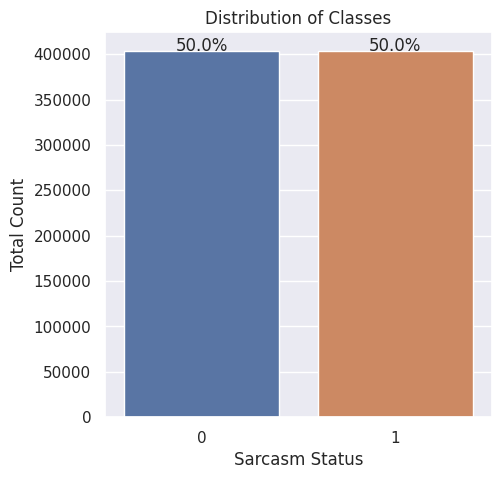

In [14]:
#Plotting percentage of sarcastic and non-sarcastic comments
plt.figure(figsize=(5,5))
ax = sns.countplot(x='label',  data= df2)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(train_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

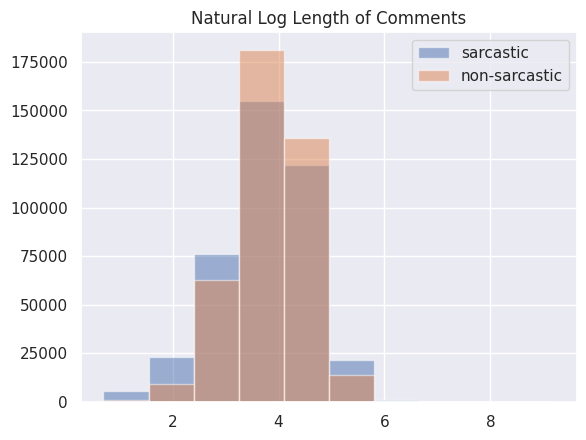

In [15]:
# To check if there is any relation between the length of the comment and its label
df2.loc[df2['label']==1,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
df2.loc[df2['label']==0,'Comments'].str.len().apply(np.log1p).hist(label='non-sarcastic', alpha=.5)
plt.legend()
plt.title('Natural Log Length of Comments')
plt.show()

Sarcastic comments are normally distributed in length. Non-sarcastic comments has a right-skew.

/tmp/ipykernel_1381273/587986772.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= False)


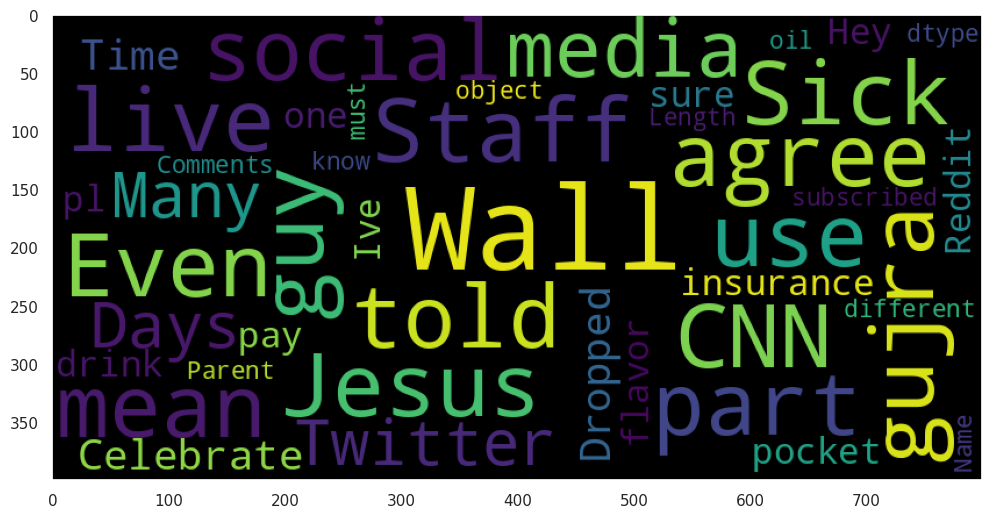

In [16]:
# Finding the most common words in the sarcastic comments using wordclous
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(df2.loc[df2['label'] == 1, 'Parent Comments']))
plt.grid(b= False)
plt.imshow(wordcloud);

In [17]:
# Comparing sarcastic comments with Parent comments
sarcasm_comm_len = np.array(df2.loc[df2['label'] == 1]['Comments'].str.len())
parent_comm_len = np.array(df2.loc[df2['label'] == 1]['Parent Comments'].str.len())
ratio_len = np.array((df2.loc[df2['label'] == 1]['Comments'].str.len())/(df2.loc[df2['label'] == 1]['Parent Comments'].str.len()))

In [18]:
d = pd.DataFrame({'Comment Length': sarcasm_comm_len, 'Parent Comment Length': parent_comm_len, 'Ratio Length': ratio_len}, columns=['Comment Length', 'Parent Comment Length', 'Ratio Length'])

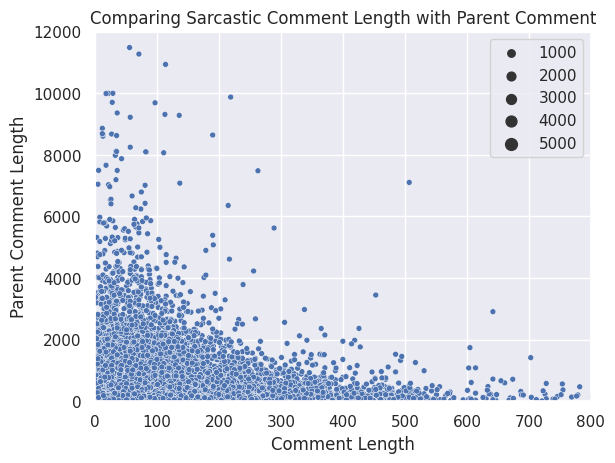

In [19]:
ax = plt.axes()
sns.scatterplot(data=d, x="Comment Length", y="Parent Comment Length",  size=ratio_len)
ax.set_title("Comparing Sarcastic Comment Length with Parent Comment")
# control x and y limits
plt.ylim(0, 12000)
plt.xlim(0, 800)
plt.show()

We find that parent comment length and comment length of sarcastic comments is almost same and there is no new information revealed with parent comments. So, we will use 'Comments' in further analysis.

# Feature Extraction

***Bag of Words Model***

To look at the most frequent words in the Comments using bag of words model

In [57]:
# vectorizer_1 = CountVectorizer(stop_words='english', ngram_range=(1, 1)) #unigram
# vectorizer_2 = CountVectorizer(stop_words='english', ngram_range=(2, 2)) #bigram

In [61]:
vectorizer_1 = CountVectorizer(ngram_range=(1, 1)) #unigram
vectorizer_2 = CountVectorizer (ngram_range=(2, 2)) #bigram

In [62]:
# Function to calculate frequency of words in comments
def freq_words(vectorizer, data):
    X = vectorizer.fit_transform(data)
    freqs = zip(vectorizer.get_feature_names(), np.asarray(X.sum(axis=0)).ravel())
    return sorted(freqs, key = lambda x: x[1], reverse=True)[:10]

In [63]:
# For unigrams from comments
l = [freq_words(vectorizer_1, df2[df2['label']==1]['Comments']),
     freq_words(vectorizer_1, df2[df2['label']==0]['Comments'])]
list(map(list, zip(*l)))

/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[('the', 1015), ('the', 931)],
 [('to', 573), ('to', 579)],
 [('you', 473), ('you', 493)],
 [('it', 447), ('and', 466)],
 [('and', 416), ('that', 431)],
 [('of', 392), ('it', 411)],
 [('that', 371), ('is', 385)],
 [('is', 365), ('of', 349)],
 [('in', 331), ('in', 275)],
 [('for', 218), ('for', 238)]]

Here, the first column shows sarcastic comments and second column shows non-sarcastic comments. Since we have not removed stopwords, we are geeting a lot of stopwords as unigrams here. Also, Unigramms from the sarcastic comments are mostly same as from the non-sarcastic comments, hence these unigramms do not help in seprating sarcastic comments from non-sarcastic comments.   

In [64]:
#bigrams
l = [freq_words(vectorizer_2, df2[df2['label']==1]['Comments']),
     freq_words(vectorizer_2, df2[df2['label']==0]['Comments'])]
list(map(list, zip(*l)))

[[('in the', 78), ('in the', 66)],
 [('of the', 78), ('you re', 58)],
 [('you re', 49), ('of the', 45)],
 [('if you', 46), ('for the', 36)],
 [('to the', 39), ('on the', 34)],
 [('it was', 37), ('to be', 31)],
 [('this is', 37), ('they are', 29)],
 [('the same', 36), ('if you', 28)],
 [('for the', 35), ('this is', 28)],
 [('to be', 34), ('you can', 28)]]

As we can see that the  bigramms vectorizer shows us better (more specific) results as compared to unigrams.

In [106]:
df2 = df2[:5000] #RAM crashes if we take more dataset

In [107]:
corpus = df2['Comments'].values.astype('U') # converting to unicode because system unable to identify special characters.

In [108]:
corpus

array(['Central Illinois',
       'To think - CNN used to be the acronym synonymous with news.',
       "But then again; you have to consider that all husbands suspecting adultery don't or are simply can't afford to go for a paternity test.",
       ..., 'stop propagating rape culture with your rape jokes.',
       'But persistence will make her fall in love with me!',
       "It was so beautiful when it wasn't raining."], dtype='<U670')

In [109]:
labels = df2['label'].to_list()

***Tf-idf Vectorizer***

In [110]:
#vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
vectorizer = TfidfVectorizer(ngram_range=(1,1))

tfidf = vectorizer.fit_transform(corpus)

In [111]:
tfidf = tfidf.toarray()

In [70]:
# cv_dataframe=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
# #print(cv_dataframe)

## Not removing stopwords

*Training the model*

*Logistic Regression*

In [30]:
# parameters = {'solver': [ 'lbfgs', 'liblinear', 'saga'], 'verbose': [0, 1, 2]}

# # multinomial logistic regression a.k.a softmax classifier
# logit = LogisticRegression(random_state= 42)

# logit_classifier = GridSearchCV(logit, parameters, cv = 10, n_jobs= 4)

# # sklearn's pipeline
# tfidf_logit_pipeline = Pipeline([('vectorizer', vectorizer), 
# ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)), ('logit_classifier', logit_classifier)])

# start = time.time()
# tfidf_logit_pipeline.fit(x_train, y_train)
# end = time.time()
# print(end - start) 

# print(logit_classifier.best_params_)
# print(logit_classifier.best_score_)

In [118]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier
clf_lr=LogisticRegression(class_weight='balanced') 
clf_lr_parameters = {'clf__solver':('newton-cg','lbfgs','liblinear','saga')}    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_lr),]) 


#Classificaion
parameters={**clf_lr_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(class_weight='balanced',
                                    solver='newton-cg'))])


In [173]:
accuracy_lr1 = accuracy_score(test_y, predicted)


In [86]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (Logistic Regression): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(test_y,predicted)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-1 (Logistic Regression): 
Accuracy:  0.622
Precision:  0.622
Recall:  0.6099290780141844
F1 Score:  0.6454033771106942
Micro f1:  0.622
Sensitivity :  0.6376146788990825
Specificity :  0.6099290780141844


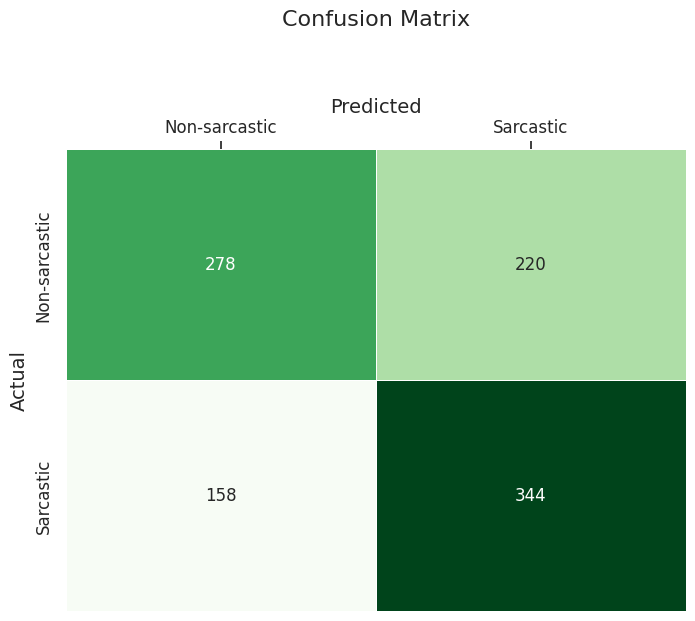

In [74]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Support Vector Machine*

In [161]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier

clf_svm=SVC()

clf_parameters = {'clf__kernel':('linear', 'poly'),#, 'rbf', 'sigmoid'),
                  'clf__C' : (0,1),#,3,5,10),
                  }    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_svm),]) 
    


#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
  File "/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in fit
  File "/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/svm/_base.py", line 251, in fit
  File "/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/svm/_base.py", line 374, in _sparse_fit


********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=1, kernel='linear'))])


In [172]:
accuracy_svm1 = accuracy_score(test_y, predicted)

In [163]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (SVM): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-1 (SVM): 
Accuracy:  0.62
Precision:  0.62
Recall:  0.6081560283687943
F1 Score:  0.6435272045028142
Micro f1:  0.62
Sensitivity :  0.5562248995983936
Specificity :  0.6832669322709163


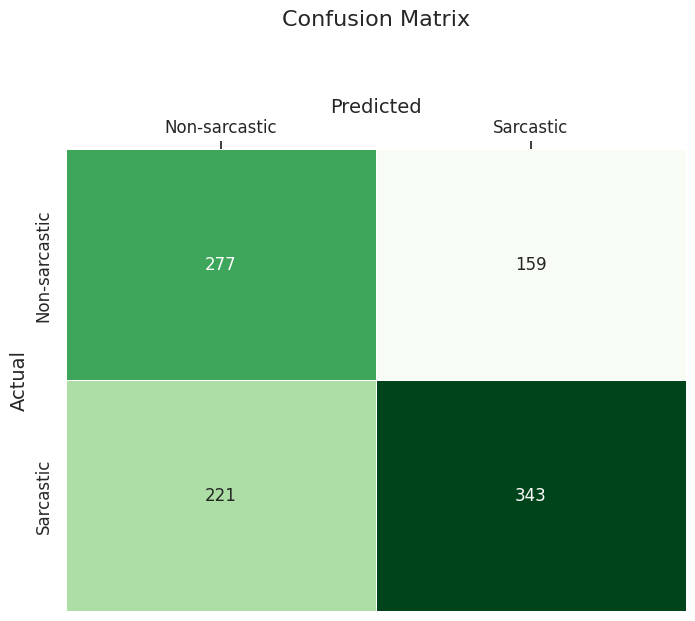

In [164]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Multinomial Naive Bayes*

In [165]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier

clf_mnb=MultinomialNB(fit_prior=True, class_prior=None)


clf_parameters = {'clf__alpha':(0,1,2),}   
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_mnb),]) 
    


#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/s

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=2))])


In [174]:
accuracy_mnb1 = accuracy_score(test_y, predicted)

In [167]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (MNB): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-1 (MNB): 
Accuracy:  0.62
Precision:  0.62
Recall:  0.6361607142857143
F1 Score:  0.6
Micro f1:  0.62
Sensitivity :  0.6726907630522089
Specificity :  0.5677290836653387


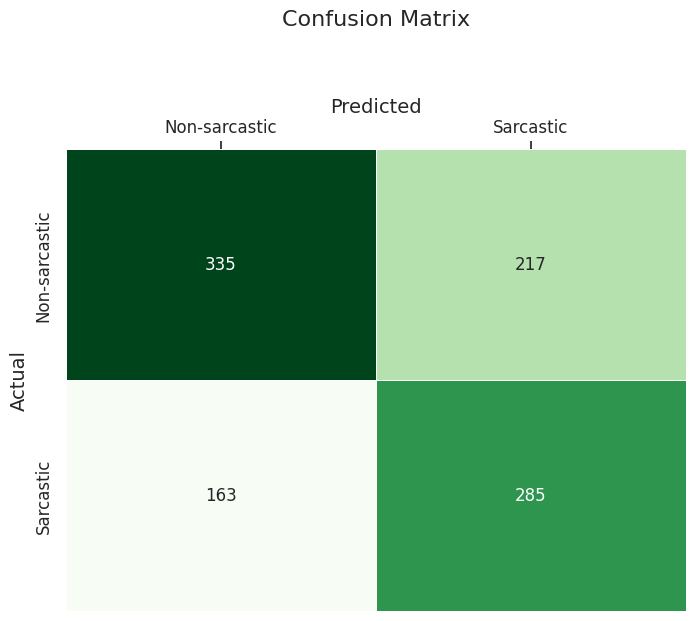

In [168]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [175]:
print ('Training Accuracies for comments without removing stop-words : ')
print ('Logistic Regression: ', accuracy_lr1)
print ('Support Vector Machine: ', accuracy_svm1)
print ('Multinomial Naive Bayes ', accuracy_mnb1)


Training Accuracies for comments without removing stop-words : 
Logistic Regression:  0.62
Support Vector Machine:  0.62
Multinomial Naive Bayes  0.62


## With stopwords

*Logistic Regression*

In [87]:
vectorizer_1 = CountVectorizer(stop_words='english', ngram_range=(1, 1)) #unigram
vectorizer_2 = CountVectorizer(stop_words='english', ngram_range=(2, 2)) #bigram

In [88]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

X = vectorizer.fit_transform(corpus)

In [91]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier
clf_lr=LogisticRegression(class_weight='balanced') 
clf_lr_parameters = {'clf__solver':('newton-cg','lbfgs','liblinear','saga')}    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_lr),]) 

feature_parameters = {
"vect__stop_words": (None, 'english'),
'vect__ngram_range': ((1,1),(1, 2)),  # Unigrams, Bigrams or Trigrams
}

#Classificaion
parameters={**feature_parameters,**clf_lr_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2),
                                 token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(class_weight='balanced', solver='saga'))])


In [176]:
accuracy_lr2 = accuracy_score(test_y, predicted)

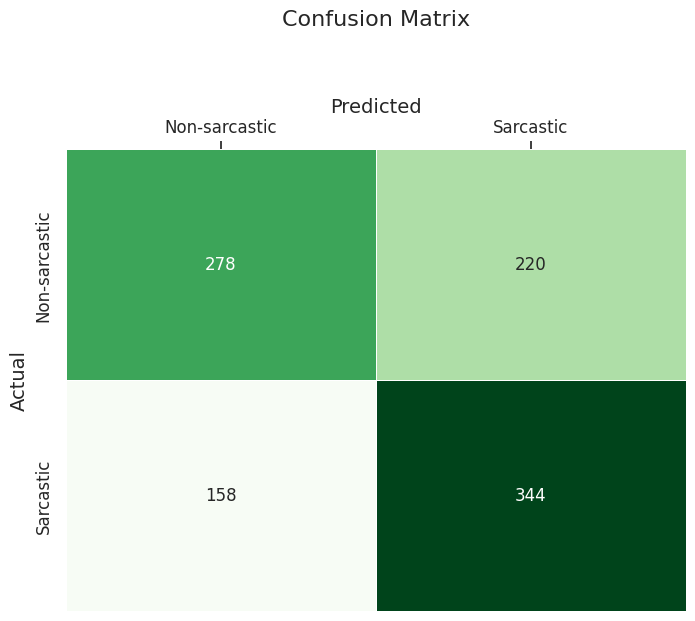

In [93]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*SVM*

In [125]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier

clf=SVC()

clf_parameters = {'clf__kernel':('linear', 'poly'),#, 'rbf', 'sigmoid'),
                  'clf__C' : (0,1),#,3,5,10),
                  }    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf),]) 

feature_parameters = {
"vect__stop_words": (None, 'english'),
'vect__ngram_range': ((1,1),(1, 2)),  # Unigrams, Bigrams or Trigrams
}

#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/svm/_base.py", line 251, in fit
    

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=1, kernel='linear'))])


In [177]:
accuracy_svm2 = accuracy_score(test_y, predicted)

In [127]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-2 (MNB): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-2 (MNB): 
Accuracy:  0.62
Precision:  0.62
Recall:  0.6081560283687943
F1 Score:  0.6435272045028142
Micro f1:  0.62
Sensitivity :  0.5562248995983936
Specificity :  0.6832669322709163


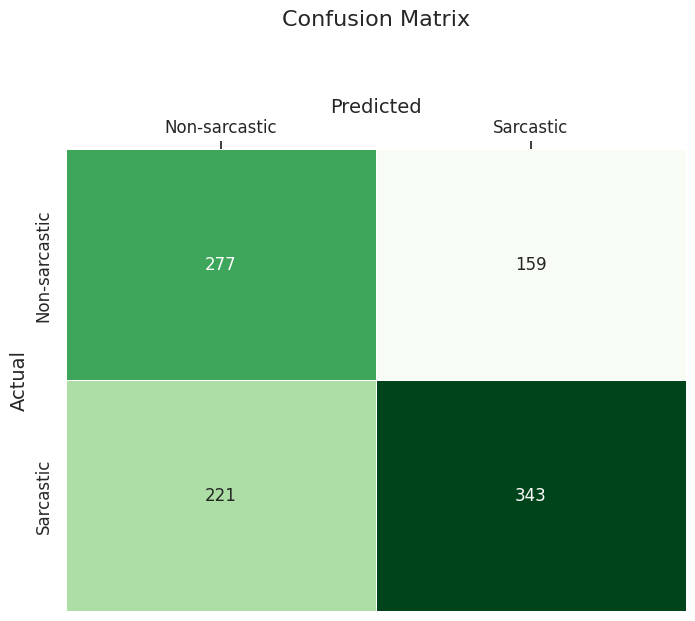

In [128]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Multinomial Naive Bayes*

In [120]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier

clf=MultinomialNB(fit_prior=True, class_prior=None)


clf_parameters = {'clf__alpha':(0,1,2),}   
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf),]) 

feature_parameters = {
"vect__stop_words": (None, 'english'),
'vect__ngram_range': ((1,1),(1, 2)),  # Unigrams, Bigrams or Trigrams
}



#Classificaion
parameters={**feature_parameters,**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/s

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2),
                                 token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=2))])


In [178]:
accuracy_mnb2 = accuracy_score(test_y, predicted)

In [124]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-2 (MNB): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-2 (MNB): 
Accuracy:  0.616
Precision:  0.616
Recall:  0.625531914893617
F1 Score:  0.6049382716049383
Micro f1:  0.616
Sensitivity :  0.6465863453815262
Specificity :  0.5856573705179283


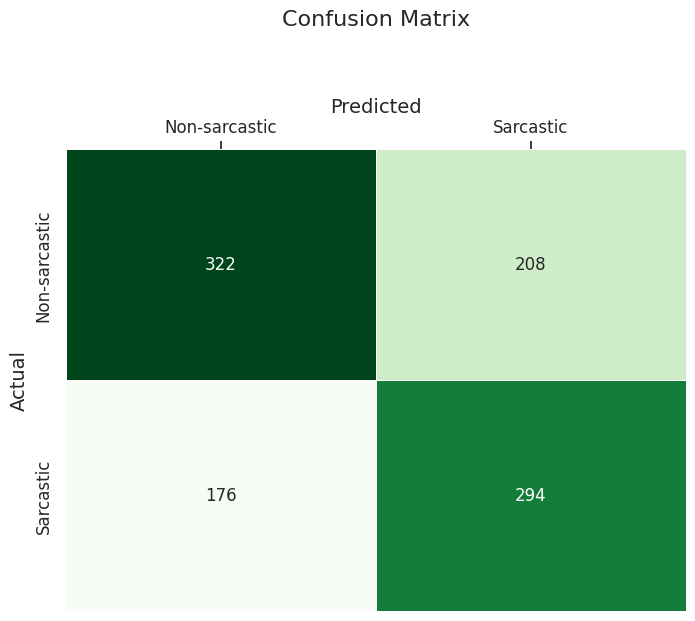

In [123]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [179]:
print ('Training Accuracies for comments without removing stop-words : ')
print ('Logistic Regression: ', accuracy_lr2)
print ('Support Vector Machine: ', accuracy_svm2)
print ('Multinomial Naive Bayes ', accuracy_mnb2)


Training Accuracies for comments without removing stop-words : 
Logistic Regression:  0.62
Support Vector Machine:  0.62
Multinomial Naive Bayes  0.62


When we applied stop words, number of words decreased and in most cases the meaning of the comments ight have also changed that's why the accuracy of all the 3 classifiers has decreased on removing stopwords.

## Stemming

In [129]:
# Function fro stemming words in comments
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
  return (PorterStemmer().stem(w) for w in analyzer(doc))

*Logistic Regression*

In [136]:
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#classifier
clf=LogisticRegression(random_state=42)  
vectorizer=TfidfVectorizer(analyzer = stemmed_words, ngram_range=(1,1), token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()

#classification
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [186]:
accuracy_lr3 = accuracy_score(test_y, predicted)

In [139]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-3 (LR): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-3 (LR): 
Accuracy:  0.643
Precision:  0.643
Recall:  0.6202321724709784
F1 Score:  0.676923076923077
Micro f1:  0.643
Sensitivity :  0.5401606425702812
Specificity :  0.7450199203187251


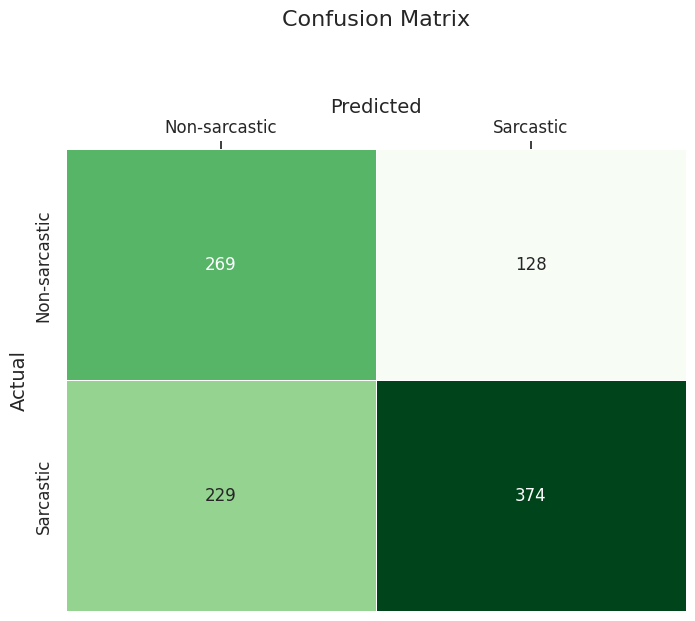

In [140]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*SVM*

In [141]:
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#classifier
clf=SVC()
vectorizer=TfidfVectorizer(analyzer = stemmed_words, ngram_range=(1,1), token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()

#classification
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [185]:
accuracy_svm3 = accuracy_score(test_y, predicted)

In [145]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-3 (SVM): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-3 (SVM): 
Accuracy:  0.645
Precision:  0.645
Recall:  0.6157480314960629
F1 Score:  0.6877748460861918
Micro f1:  0.645
Sensitivity :  0.5100401606425703
Specificity :  0.7788844621513944


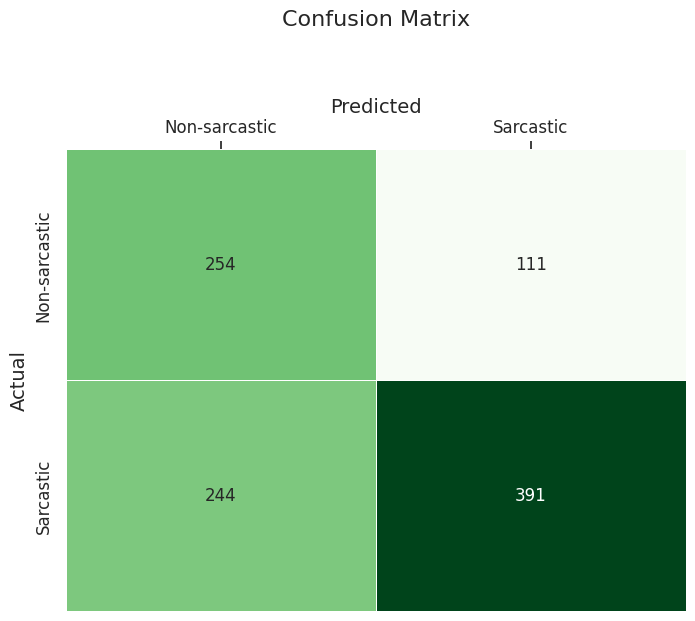

In [146]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Mutlinomial Naive Bayes*

In [130]:
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#classifier
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
vectorizer=TfidfVectorizer(analyzer = stemmed_words, ngram_range=(1,1), token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()

#classification
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [184]:
accuracy_mnb3 = accuracy_score(test_y, predicted)

In [134]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-3 (MNB): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-3 (MNB): 
Accuracy:  0.569
Precision:  0.569
Recall:  0.5689320388349515
F1 Score:  0.576204523107178
Micro f1:  0.569
Sensitivity :  0.5542168674698795
Specificity :  0.5836653386454184


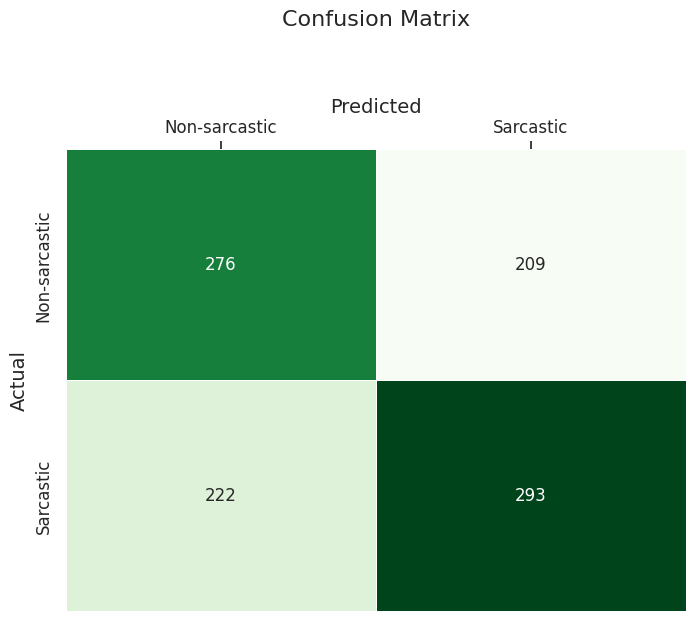

In [135]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [ ]:
print ('Training Accuracies for comments without removing stop-words : ')
print ('Logistic Regression: ', accuracy_lr3)
print ('Support Vector Machine: ', accuracy_svm3)
print ('Multinomial Naive Bayes ', accuracy_mnb3)


## Lemmatization

In [147]:
analyzer = CountVectorizer().build_analyzer()
def lemmatized_words(doc):
  return (WordNetLemmatizer().lemmatize(w) for w in analyzer(doc))

In [148]:
clf=LogisticRegression()  
vectorizer=TfidfVectorizer(analyzer = lemmatized_words,ngram_range=(1,1),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [182]:
accuracy_lr4 = accuracy_score(test_y, predicted)

In [150]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-4(LR): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-4(LR): 
Accuracy:  0.642
Precision:  0.642
Recall:  0.6204013377926422
F1 Score:  0.6745454545454544
Micro f1:  0.642
Sensitivity :  0.5441767068273092
Specificity :  0.7390438247011952


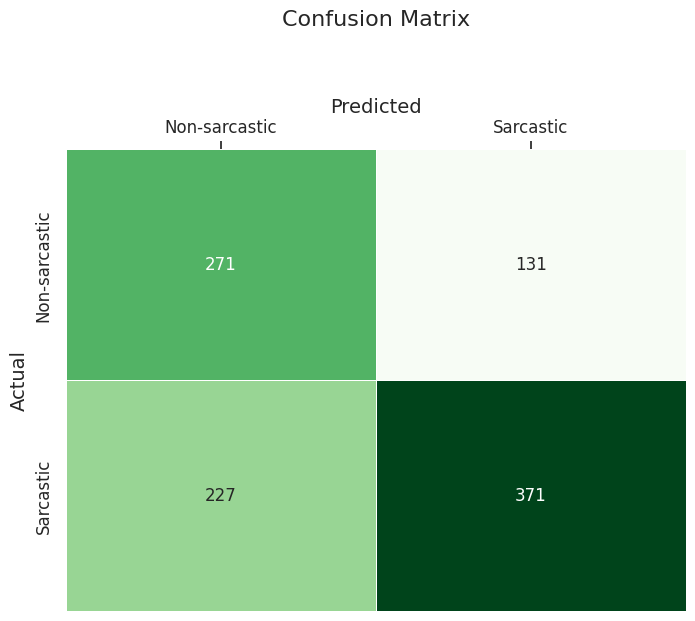

In [151]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [152]:
clf=SVC()  
vectorizer=TfidfVectorizer(analyzer = lemmatized_words,ngram_range=(1,1),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [181]:
accuracy_svm4 = accuracy_score(test_y, predicted)

In [154]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-4 (SVM): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-4 (SVM): 
Accuracy:  0.633
Precision:  0.633
Recall:  0.6059654631083202
F1 Score:  0.6777875329236172
Micro f1:  0.633
Sensitivity :  0.4959839357429719
Specificity :  0.7689243027888446


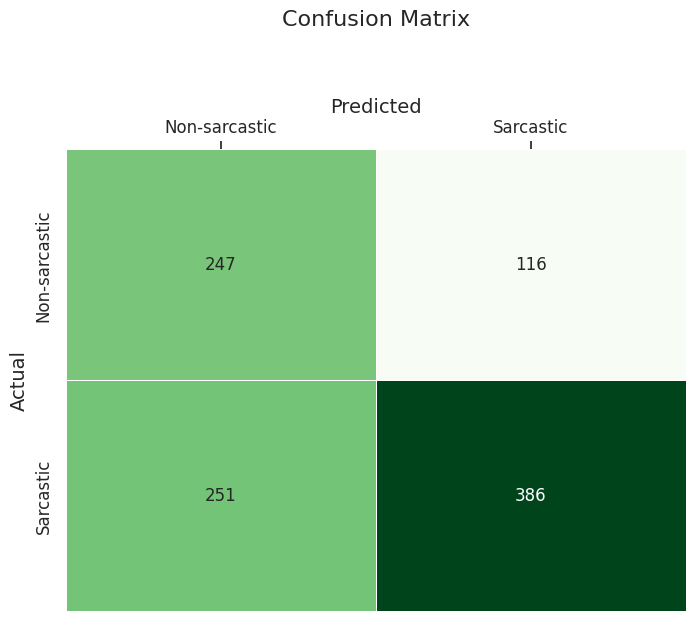

In [155]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*MNB*

In [156]:
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
vectorizer=TfidfVectorizer(analyzer = lemmatized_words,ngram_range=(1,1),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

/DATA1/NLP/utkarsha_18300/env/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [180]:
accuracy_mnb4 = accuracy_score(test_y, predicted)

In [158]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-5: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-5: 
Accuracy:  0.577
Precision:  0.577
Recall:  0.5766990291262136
F1 Score:  0.584070796460177
Micro f1:  0.577
Sensitivity :  0.5622489959839357
Specificity :  0.5916334661354582


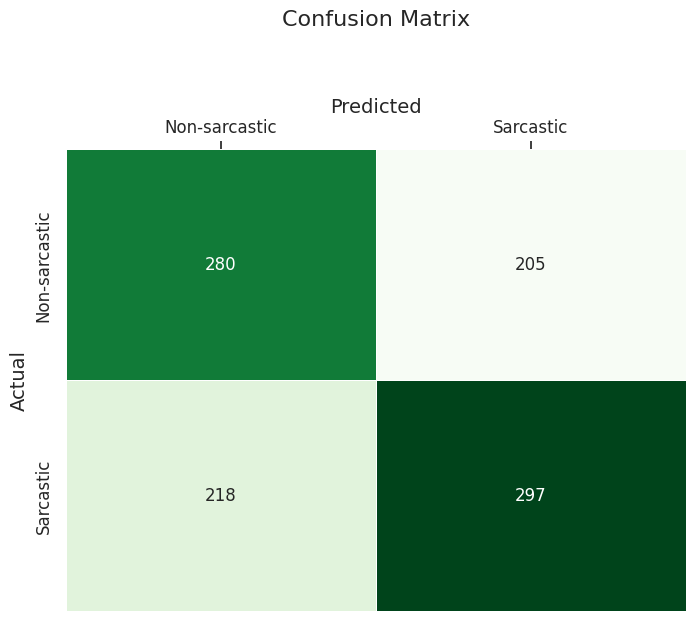

In [159]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [ ]:
print ('Training Accuracies for comments without removing stop-words : ')
print ('Logistic Regression: ', accuracy_lr4)
print ('Support Vector Machine: ', accuracy_svm4)
print ('Multinomial Naive Bayes ', accuracy_mnb4)


In [ ]:
# Y_pred = logit_classifier.predict(X_test)
# report = classification_report(Y_pred,Y_test, output_dict=True)
# report = pd.DataFrame(report).transpose()
# report = report.rename({"0": "Sarcastic Comments", "1": "Non Sarcastic Comments"})
# report

In [30]:
# #pipeline parameters
# parameters = \
# [ \
#     {
#         'clf': [MultinomialNB()],
#         'tf-idf__stop_words': ['english', None],
#         'clf__alpha': [0.001, 0.1, 1, 10, 100]
#     },

#     {
#         'clf': [SVC()],
#         'tf-idf__stop_words': ['english', None],
#         'clf__C': [0.001, 0.1, 1, 10, 100, 10e5],
#         'clf__kernel': ['linear', 'rbf'],
#         'clf__class_weight': ['balanced'],
#         'clf__probability': [True]
#     },

#     {
#         'clf': [LogisticRegression()],
#         'tf-idf__stop_words': ['english', None],
#         'clf__criterion': ['gini','entropy'],
#         'clf__splitter': ['best','random'],
#         'clf__class_weight':['balanced', None]
#     }
# ]

# #evaluating multiple classifiers
# #based on pipeline parameters
# #-------------------------------
# result=[]

# for params in parameters:

# #classifier
#     clf = params['clf'][0]

# #getting arguments by
# #popping out classifier
#     params.pop('clf')

# #pipeline
#     steps = [('tf-idf', TfidfVectorizer()), ('clf',clf)]

# #cross validation using
# #Grid Search
#     grid = GridSearchCV(Pipeline(steps), param_grid=params, cv=10)
#     grid.fit(corpus, labels)

# #storing result
#     result.append\
#     (
#         {
#             'grid': grid,
#             'classifier': grid.best_estimator_,
#             'best score': grid.best_score_,
#             'best params': grid.best_params_,
#             'cv': grid.cv
#         }
#     )   

# #sorting result by best score
# result = sorted(result, key=itemgetter('best score'),reverse=True)

# #saving best classifier
# grid = result[0]['grid']
# print(grid)

In [80]:

#test dataset
#Y_pred = logit_classifier.predict(X_test)
